# Breast Cancer Wisconsin Diagnostic Prediction
**Benign or Malignant Cancer Tumors**

### Eigen-Vectors and Eigen-Values

#### **Developed by** [**Parth Maniar** ](https://github.com/officialpm)  🖖

<img src="https://visitor-badge.laobi.icu/badge?page_id=officialpm.BreastCancerEigen-Vectors&Eigen-Values" alt="visitor badge"/>
<div>

<a href="mailto:officialparthmaniar@gmail.com">
  <img align="left" alt="Parth's LinkedIn" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/gmail.svg" />
</a>

<a href="https://twitter.com/parthcodes">
  <img align="left" alt="Parth | Twitter" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/twitter.svg" />
</a>
<a href="https://www.linkedin.com/in/parthdmaniar/">
  <img align="left" alt="Parth's LinkedIn" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/linkedin.svg" />
</a>
<a href="https://t.me/parthmaniar">
  <img align="left" alt="Parth's Telegram" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/telegram.svg" />
</a>


</div>
<br/>

---


# Downloading dataset from UCI
---
Dataset Link - https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data

--2020-11-11 14:04:42--  https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124103 (121K) [application/x-httpd-php]
Saving to: ‘wdbc.data’

wdbc.data           100%[===================>] 121.19K   312KB/s    in 0.4s    

2020-11-11 14:04:43 (312 KB/s) - ‘wdbc.data’ saved [124103/124103]



In [2]:
import pandas as pd

In [3]:
headers = ["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]
data = pd.read_csv('wdbc.data', names=headers)

# Eigen-Vectors and Eigen-Values

Eigenvectors and eigenvalues are used to reduce noise in data. They can help us improve efficiency in computationally intensive tasks. They also eliminate features that have a strong correlation between them and also help in reducing over-fitting.

Eigenvalues and eigenvectors form the basics of computing and mathematics.

* PCA is used for dimensionality reduction process, it is used to reduce the size of large dimensions of data without affecting the performance of the model.

* PCA will take only that data which is important or which is having larger variance on that axis.

* PCA uses eigenvalue and eigenvector to identify the best dimension in which we are getting high variance of data or dimension in which a large quantity of data present.

* The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the “core” of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

## Standardizing Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# slicing out the predictor variables/features
X=data.iloc[:,2:32]
print(type(X))
# displaying the first five rows of X
X.head()

<class 'pandas.core.frame.DataFrame'>


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
from sklearn.preprocessing import StandardScaler
X_std_model = StandardScaler()
X_std = X_std_model.fit(X)
X_std = X_std_model.transform(X)

Now we will create a covariance matrix, this covariance matrix will tell that how much two features are related and also this will help us to get eigenvalues and eigenvectors.


In [8]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n \n %s' %cov_mat)
from numpy.linalg import eig
values, vectors = eig(cov_mat) #eigen values and eigen vectors

Covariance matrix 
 
 [[ 1.00176056e+00  3.24351929e-01  9.99612069e-01  9.89095475e-01
   1.70881506e-01  5.07014640e-01  6.77955036e-01  8.23976636e-01
   1.48001350e-01 -3.12179472e-01  6.80285970e-01 -9.74887767e-02
   6.75358538e-01  7.37159198e-01 -2.22992026e-01  2.06362656e-01
   1.94545531e-01  3.76831225e-01 -1.04504545e-01 -4.27163418e-02
   9.71245907e-01  2.97530545e-01  9.66835698e-01  9.42739295e-01
   1.19826732e-01  4.14190751e-01  5.27839123e-01  7.45524434e-01
   1.64241985e-01  7.07832563e-03]
 [ 3.24351929e-01  1.00176056e+00  3.30113223e-01  3.21650988e-01
  -2.34296930e-02  2.37118951e-01  3.02950254e-01  2.93980713e-01
   7.15266864e-02 -7.65717560e-02  2.76354360e-01  3.87037830e-01
   2.82169018e-01  2.60302460e-01  6.62542133e-03  1.92312595e-01
   1.43545353e-01  1.64139495e-01  9.14323671e-03  5.45533955e-02
   3.53193674e-01  9.13650301e-01  3.58669926e-01  3.44150782e-01
   7.76398084e-02  2.78318729e-01  3.01555198e-01  2.95835766e-01
   1.05192783e-01  

Now we have eigenvalues and eigenvectors. 

So we can sort eigenvectors on the basis of eigenvalues to get top rated eigenvectors.

In [9]:
print("Shape of Eigen Vectors ", vectors.shape)
print("Shape of Eigen Values ", values.shape)

Shape of Eigen Vectors  (30, 30)
Shape of Eigen Values  (30,)



Eigen Values are variance explained by each of the vectors in its direction, So we will take those features which are having very high eigen values, So we are sorting our eigen vectors on the basis of eigen values.

In [10]:
eigen_pair = sorted([(np.abs(values[i]), vectors[:,i]) for i in range(len(values))], key = lambda x: x[0], reverse = True)
eigen_pair

[(13.304990794374556,
  array([0.21890244, 0.10372458, 0.22753729, 0.22099499, 0.14258969,
         0.23928535, 0.25840048, 0.26085376, 0.13816696, 0.06436335,
         0.20597878, 0.01742803, 0.21132592, 0.20286964, 0.01453145,
         0.17039345, 0.15358979, 0.1834174 , 0.04249842, 0.10256832,
         0.22799663, 0.10446933, 0.23663968, 0.22487053, 0.12795256,
         0.21009588, 0.22876753, 0.25088597, 0.12290456, 0.13178394])),
 (5.701374603726141,
  array([-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
          0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
         -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
          0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
         -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
          0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947])),
 (2.8229101550062277,
  array([-0.00853124,  0.0645499 , -0.00931422,  0.02869953, -0.1042919

In [11]:
var_exp = [(i / sum(values))*100 for i in sorted(values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

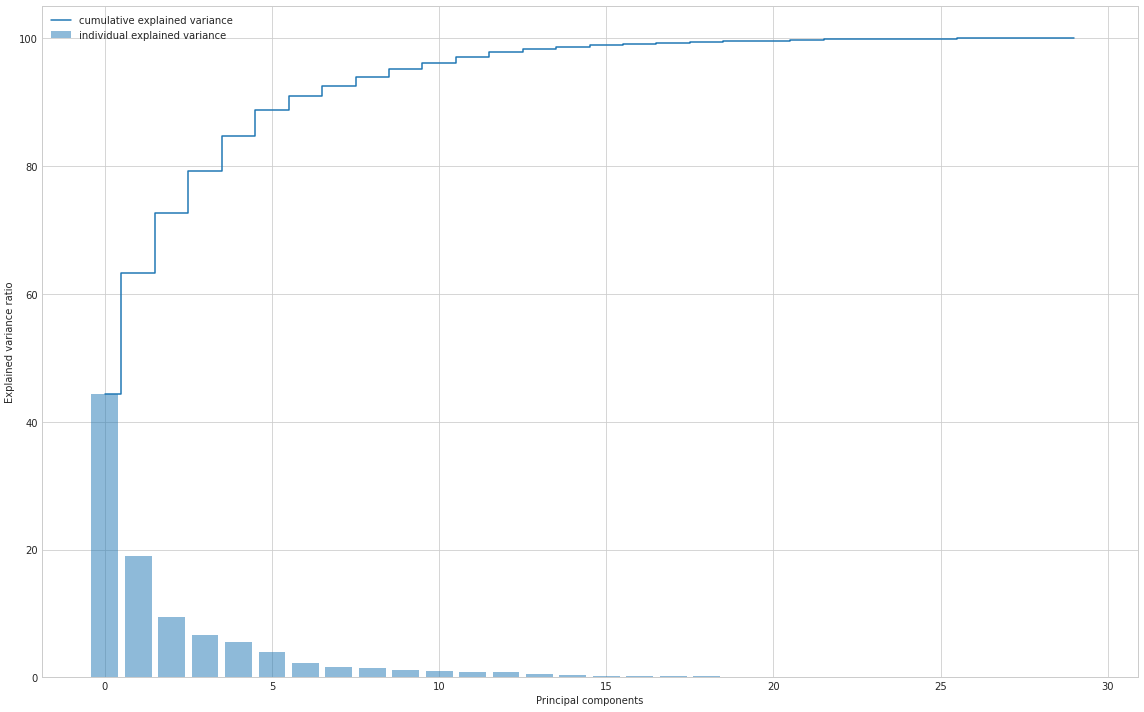

In [12]:
import matplotlib.pyplot as plt
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(16, 10))

    plt.bar(range(30), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(30), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

From the graph, we can see that nearly 15 eigenvectors having good eigenvalues. So out of 30 eigenvectors, we will take only 15 eigenvectors for further analysis, because rest features having 0 eigenvalues, it means their presence will not affect the output of the model.

In [13]:
# I have taken top 15 eigen vectors for creating new features.
matrix = []
for values in eigen_pair[:15]:
    matrix.append(values[1])

so the shape of the eigenvectors will reduce to (15, 30) from (30,30). We will use 15, 30 eigenvectors to create our new Dataset.

In [14]:
X_pca = np.array(matrix).transpose()

Now eigenvectors shape becomes (30, 15). 
Do the Matrix multiplication between our standardization data which has shape (569,30) and eigenvectors(30, 15). This will generate a new dataset of shapes (569,15).

In [15]:
X_re = X_std.dot(X_pca)

**Now, we can do Train, Validation and Test Split on this dataset.**